In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [70]:
stock = 'AAPL'
start = '2018-01-01' 
end = '2021-06-22'
data = yf.download(stock, start, end)
#data.head()
df = data.reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.310070,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.302879,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.494736,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.967163,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.811283,82271200


In [71]:
X = df.drop(['Date','Adj Close'], axis=1, inplace=True)
y = df[['Close']]

In [72]:
df = df.values

In [73]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25,  random_state=0)

In [74]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8.274980700662127e-10


In [76]:
regression_model.score(X_test, y_test)

1.0

In [77]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

1.2881644659977332e-19

In [78]:
math.sqrt(regression_model_mse)

3.58910081496429e-10

In [79]:
# input the latest Open, High, Low, Close, Volume
# predicts the next day price
regression_model.predict([[54.06, 58.74, 51.05, 55.69, 270010000]])

array([[55.69]])

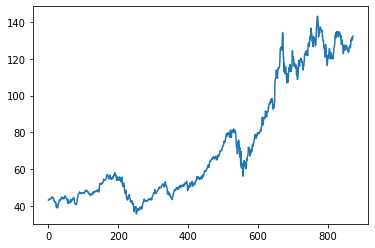

In [80]:
df = data.reset_index()
y = df[['Close']]
plt.plot(y)